# FMCW Radar 2025 - mmWave Atmospheric Absorptoin



## Millimeter–wave Propagation Model (MPM)

millimeter wave propagation model MPM as described in H.J. Liebe, G.A. Hufford, M.G. Cotton, " Propagation modeling of moist air and suspended water/ice particles at frequencies below 1000 GHz" Proc. NATO/AGARD Wave Propagation Panel, 52nd meeting, No. 3/1-10, Mallorca, Spain, 17 - 20 May, 1993.

In [ ]:
!pip install git+https://github.com/cchwala/pyMPM.git

  Cloning https://github.com/cchwala/pyMPM.git to /tmp/pip-req-build-7rbn76ac
  Running command git clone --filter=blob:none --quiet https://github.com/cchwala/pyMPM.git /tmp/pip-req-build-7rbn76ac
  Resolved https://github.com/cchwala/pyMPM.git to commit c3b9df0a2bbb691957397a0bec5474a0ff571dd9
  Preparing metadata (setup.py) ... done
  Created wheel for pyMPM: filename=pyMPM-0.2.0-py3-none-any.whl size=6748 sha256=2ffabfb89a790a46ebe7e984990dc82b9d3f7adea8eebdff7169c681f2b83a3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-i331n0bn/wheels/c1/e9/91/1345e0bab7c7d9288129fc593b5d93feecdb2a406d9a290199
Successfully built pyMPM


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from pyMPM import MPM

In [ ]:
def Amax(fmin, fmax, RH=0):
    """ returns the max attenuation between two freq at given RH """
    A_max = 0
    f_max = 0
    #RH = 100  # Relative humidity in %
    T = 15  # Air temperature in degree Celcius
    P = 1013  # Air pressiure in mbar

    for f in range(fmin, fmax+1):
        A = MPM(f, P, T, RH, 0, 0, 0, 'att')
        if A > A_max:
            f_max = f
            A_max = A[0]
    return f_max, A_max


def Amin(fmin, fmax, RH=100):
    """ returns the minimum attenuation between two freq at given RH """
    A_min = 1e5
    f_min = 0
    #RH = 100  # Relative humidity in %
    T = 15  # Air temperature in degree Celcius
    P = 1013  # Air pressiure in mbar

    for f in range(fmin, fmax+1):
        A = MPM(f, P, T, RH, 0, 0, 0, 'att')
        if A < A_min:
            f_min = f
            A_min = A[0]
    return f_min, A_min

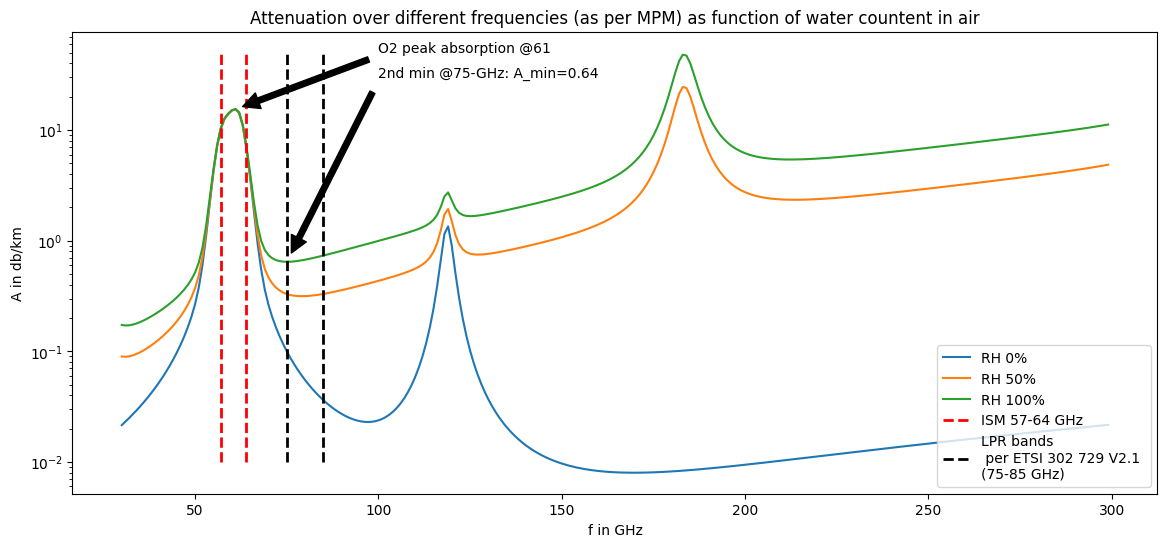

In [ ]:
# compute local minima and maxima
f1, a1 = Amin(20, 50, RH=100)
f2, a2 = Amin(60, 120, RH=100)
f3, a3 = Amin(60, 120, RH=0)
f4, a4 = Amax(60, 64)
y1 = int(a1*100)/100
y2 = int(a2*100)/100

# define figure for plotting
fig, ax = plt.subplots(figsize=(14,6))

# from 30GHz to 300GHz to focus on millimeter wave
f = np.arange(30,300)    # Vector of frequencies in GHz
T = 15                # Air temperature in degree Celcius
P = 1013              # Air pressiure in mbar
RH_vec = [0, 50, 100] # List of relative humidity values used for plotting

for RH in RH_vec:
    A = MPM(f, P, T, RH, 0, 0, 0, 'att')
    ax.semilogy(f,A, label='RH ' + str(RH) + '%')

# multiple lines with varying ymin and ymax
plt.vlines(x=[57, 64], ymin=[0.01, 0.01], ymax=[50, 50], colors='red', ls='--', lw=2, label='ISM 57-64 GHz')
plt.vlines(x=[75, 85], ymin=[0.01, 0.01], ymax=[50, 50], colors='black', ls='--', lw=2, label='LPR bands\n per ETSI 302 729 V2.1 \n(75-85 GHz)')

ax.set_xlabel('f in GHz')
ax.set_ylabel('A in db/km')

#ax.annotate(f'1st min @({f1},{y1})', xy=(f1, y1), xytext=(10, 2),
#            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate(f'O2 peak absorption @{f4}', xy=(f4, a4), xytext=(100, 50),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate(f'2nd min @{f2}-GHz: A_min={y2}', xy=(f2, y2), xytext=(100, 30),
            arrowprops=dict(facecolor='black', shrink=0.05))


plt.title("Attenuation over mmWave frequencies (as per MPM) as function of water countent in air")
plt.legend(loc=4)

## INFRARED RANGE
300 GHz to 400 THz

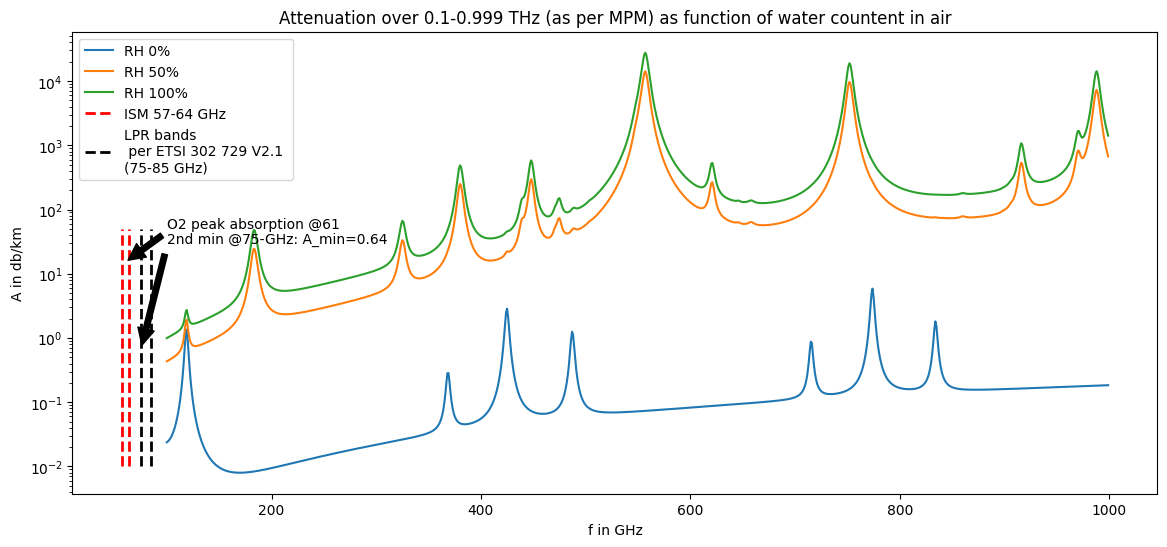

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

f = np.arange(300,1000)    # Vector of frequencies in GHz
T = 15                # Air temperature in degree Celcius
P = 1013              # Air pressiure in mbar
RH_vec = [0, 50, 100] # List of relative humidity values used for plotting

for RH in RH_vec:
    A = MPM(f, P, T, RH, 0, 0, 0, 'att')
    ax.semilogy(f,A, label='RH ' + str(RH) + '%')

# multiple lines with varying ymin and ymax
plt.vlines(x=[57, 64], ymin=[0.01, 0.01], ymax=[50, 50], colors='red', ls='--', lw=2, label='ISM 57-64 GHz')
plt.vlines(x=[75, 85], ymin=[0.01, 0.01], ymax=[50, 50], colors='black', ls='--', lw=2, label='LPR bands\n per ETSI 302 729 V2.1 \n(75-85 GHz)')

ax.set_xlabel('f in GHz')
ax.set_ylabel('A in db/km')
y1 = int(a1*100)/100
#ax.annotate(f'1st min @({f1},{y1})', xy=(f1, y1), xytext=(10, 2),
#            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate(f'O2 peak absorption @{f4}', xy=(f4, a4), xytext=(100, 50),
            arrowprops=dict(facecolor='black', shrink=0.05))
y2 = int(a2*100)/100
ax.annotate(f'2nd min @{f2}-GHz: A_min={y2}', xy=(f2, y2), xytext=(100, 30),
            arrowprops=dict(facecolor='black', shrink=0.05))
#y3 = int(a3*100)/100
#ax.annotate(f'3rd min @({f3}-GHz: A_min={y3}', xy=(f3, y3), xytext=(100, 10),
#            arrowprops=dict(facecolor='black', shrink=0.05))

fmin = f[0]/1e3
fmax=f[-1]/1e3
plt.title(f"Attenuation over {fmin}-{fmax} THz (as per MPM) as function of water countent in air")
plt.legend(loc=2)

## NIR
Near-infrared 214–400 THz

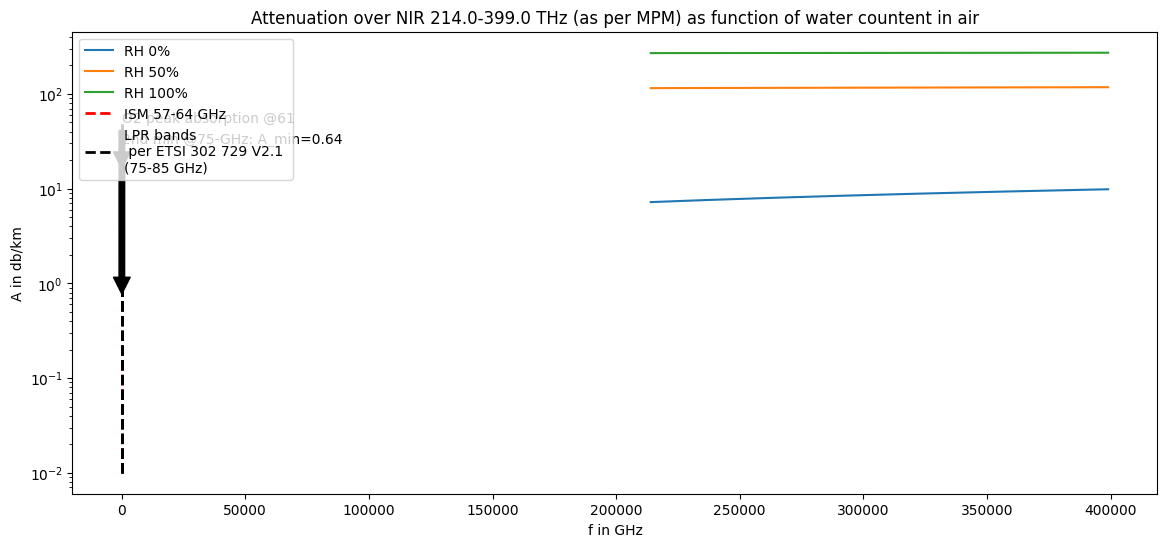

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

f = np.arange(214*1000,400*1000,1000)    # Vector of frequencies in GHz
T = 15                # Air temperature in degree Celcius
P = 1013              # Air pressiure in mbar
RH_vec = [0, 50, 100] # List of relative humidity values used for plotting

for RH in RH_vec:
    A = MPM(f, P, T, RH, 0, 0, 0, 'att')
    ax.semilogy(f,A, label='RH ' + str(RH) + '%')

# multiple lines with varying ymin and ymax
plt.vlines(x=[57, 64], ymin=[0.01, 0.01], ymax=[50, 50], colors='red', ls='--', lw=2, label='ISM 57-64 GHz')
plt.vlines(x=[75, 85], ymin=[0.01, 0.01], ymax=[50, 50], colors='black', ls='--', lw=2, label='LPR bands\n per ETSI 302 729 V2.1 \n(75-85 GHz)')

ax.set_xlabel('f in GHz')
ax.set_ylabel('A in db/km')
y1 = int(a1*100)/100
#ax.annotate(f'1st min @({f1},{y1})', xy=(f1, y1), xytext=(10, 2),
#            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate(f'O2 peak absorption @{f4}', xy=(f4, a4), xytext=(100, 50),
            arrowprops=dict(facecolor='black', shrink=0.05))
y2 = int(a2*100)/100
ax.annotate(f'2nd min @{f2}-GHz: A_min={y2}', xy=(f2, y2), xytext=(100, 30),
            arrowprops=dict(facecolor='black', shrink=0.05))
#y3 = int(a3*100)/100
#ax.annotate(f'3rd min @({f3}-GHz: A_min={y3}', xy=(f3, y3), xytext=(100, 10),
#            arrowprops=dict(facecolor='black', shrink=0.05))

fmin = f[0]/1e3
fmax=f[-1]/1e3
plt.title(f"Attenuation over NIR {fmin}-{fmax} THz (as per MPM) as function of water countent in air")
plt.legend(loc=2)

## BACK-UP / PLAYGROUND
below does not work or not tested

In [ ]:
!pip install git+https://github.com/pylayers/pylayers.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pylayers/pylayers.git to /tmp/pip-req-build-lrerdym5
  Running command git clone --filter=blob:none --quiet https://github.com/pylayers/pylayers.git /tmp/pip-req-build-lrerdym5
  Resolved https://github.com/pylayers/pylayers.git to commit d9bc71ffe26453f6b6b7a246d059b7c319c468b4
  Preparing metadata (setup.py) ... done
  Created wheel for pylayers: filename=pylayers-0.5-py3-none-any.whl size=873628 sha256=d6de24bf7b0611f51fbaa7d1b6fa4c19479a5826d4d441e78c757839a592d506
  Stored in directory: /tmp/pip-ephem-wheel-cache-bfz4liko/wheels/8a/2d/13/a075c608d252e7da73260f349c019529687a999b1a14e71d0e
Successfully built pylayers


In [ ]:
!ls /usr/local/lib/python3.10/dist-packages/pylayers

antprop  exploit  gui	       location  mobility  __pycache__	simul
em	 gis	  __init__.py  measures  network   signal	util


In [ ]:
!pip install -r https://raw.githubusercontent.com/pylayers/pylayers/master/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.9/490.9 kB 5.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from pylayers.antprop.loss import *

# set the temperature to 15deg Celsius
T = 15
# set the atmospheric pressure
PhPa = 1013
# set the wave vapor density ( g/m^3)
wvden = 7.5
# set distance in meters
d = 1000
fGHz = np.linspace(1,1000,500)
# calculate specific attenuation (wet)
Lw= gaspl(d,fGHz,T,PhPa,wvden)
# calculate specific attenuation (dry)
Ls= gaspl(d,fGHz,T,PhPa,0)
fs = 18
plt.semilogy(fGHz,Lw,linewidth=2)
plt.semilogy(fGHz,Ls,'r',linewidth=2)
plt.grid(True,which="both",ls='--')
plt.xlabel('Frequency (GHz)',fontsize=fs)
plt.ylabel('Specific Attenuation (dB)',fontsize=fs)
plt.show()

ModuleNotFoundError: ignored